In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [4]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.columns

Index(['date', 'value'], dtype='object')

In [7]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

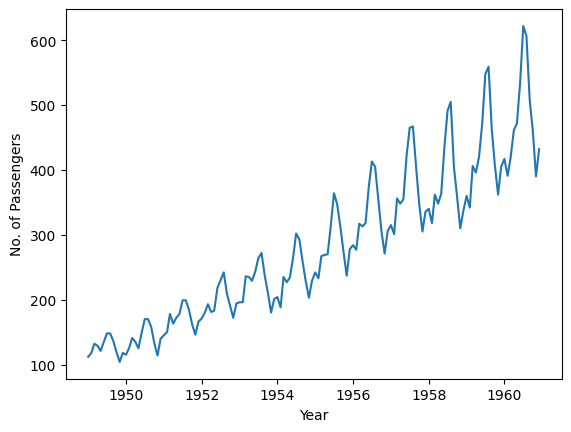

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.plot(df['date'], df['value'])
plt.xlabel("Year")
plt.ylabel("No. of Passengers")
plt.show()

In [9]:
df = df.set_index('date', inplace=False)

In [10]:
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


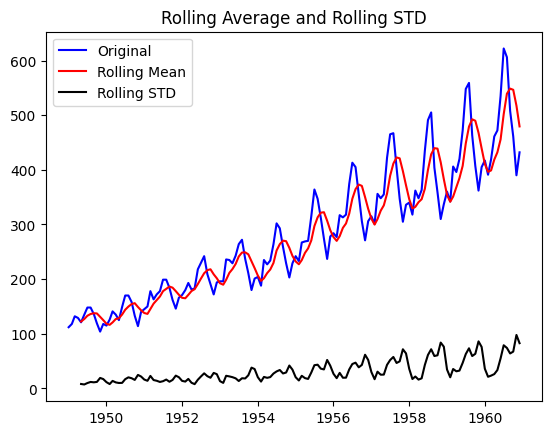

In [11]:
import seaborn as sns
movingAverage = df.rolling(window=5).mean()
movingSTD = df.rolling(window=5).std()
plt.plot(df, color='blue', label='Original')
plt.plot(movingAverage, color='red', label='Rolling Mean')
plt.plot(movingSTD, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title("Rolling Average and Rolling STD")
plt.show()

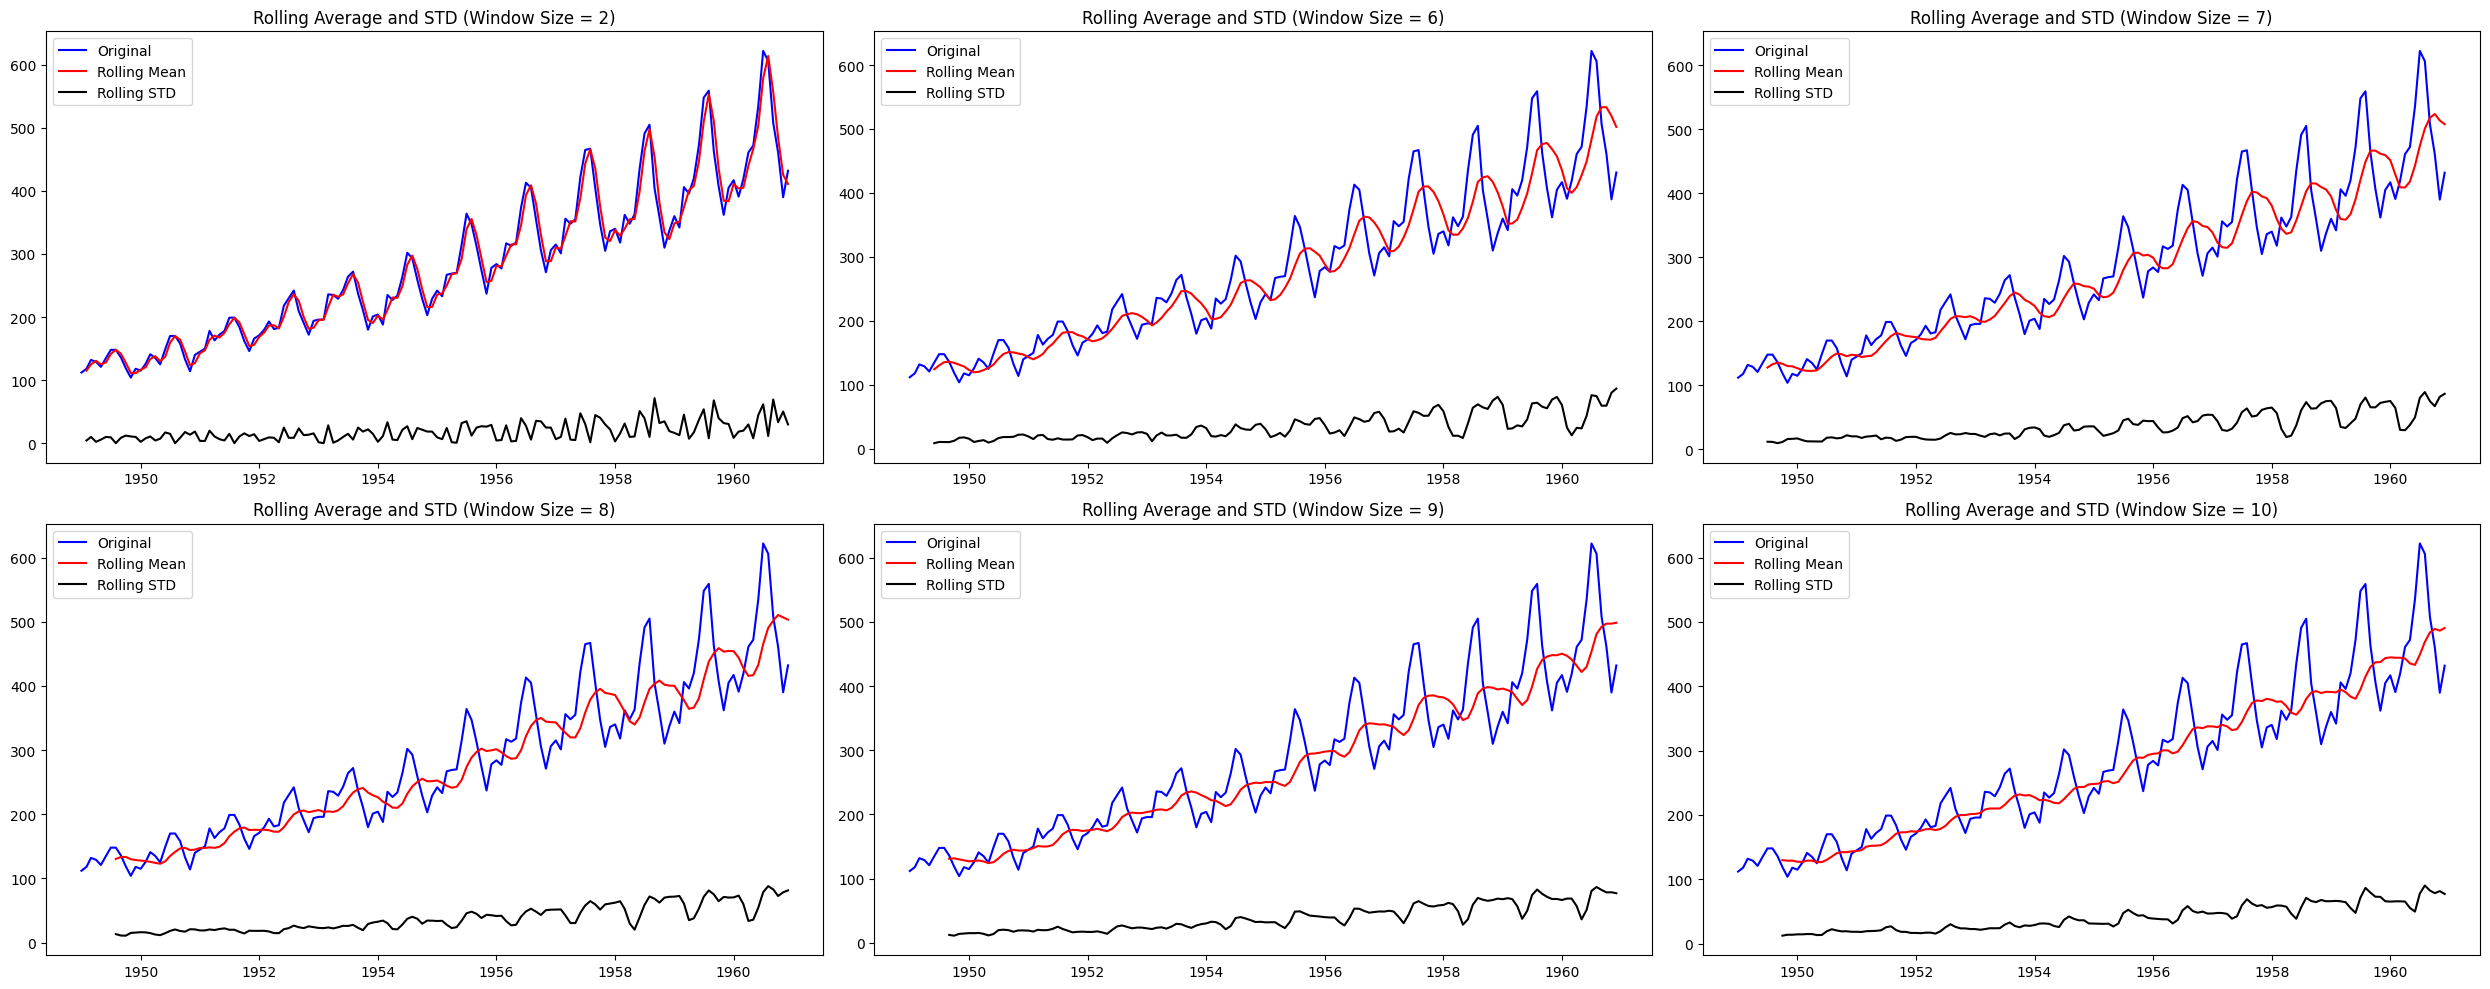

In [12]:
# Define window sizes
window_sizes = [2, 6, 7, 8, 9, 10]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Plot each subplot
for ax, window in zip(axes.flatten(), window_sizes):
    movingAverage = df.rolling(window=window).mean()
    movingSTD = df.rolling(window=window).std()
    
    ax.plot(df, color='blue', label='Original')
    ax.plot(movingAverage, color='red', label='Rolling Mean')
    ax.plot(movingSTD, color='black', label='Rolling STD')
    ax.legend(loc='best')
    ax.set_title(f"Rolling Average and STD (Window Size = {window})")

# Adjust layout
plt.tight_layout()
plt.show()

ADF test is c onducted with the following assumptions.
- Null Hypothesis (H0) - Series is non-stationary, or series has a unit root
- Alternate Hypothesis (HA) - Series is stationary, or series has no unit root.

If null hypothesis is failed to be rejected, this test may provide evidence that the series in not stationary.

Conditions to Reject Null Hypothesis

If test statistic < critical value and p-value < 0.05, then Reject null hypothesis.

In [13]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [14]:
# ADF Test

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#Call the function
adf_test(df['value'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

The KPSS test is conducted with the following assumptions.

- Null Hypothesis : Series is trend stationary or series has no unit root
- Alternate Hypothesis : Series is non-stationary or 

In [15]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS test: ")
    kpsstest = kpss(timeseries, regression='c', nlags='auto')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#Lags used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

kpss_test(df['value'])

Results of KPSS test: 
Test Statistic           1.651312
p-value                  0.010000
#Lags used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_22484\461419555.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags='auto')


`Converting a non-stationary Time-series into Stationary Time-series`

<Axes: xlabel='date'>

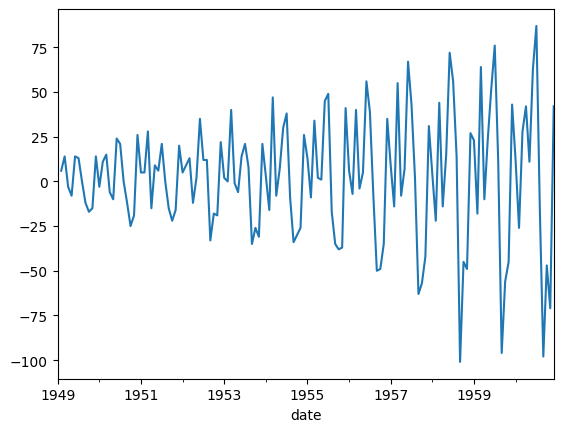

In [16]:
# Differencing

df['value_diff'] = df['value'] - df['value'].shift(1)
df['value_diff'].plot()

<Axes: xlabel='date'>

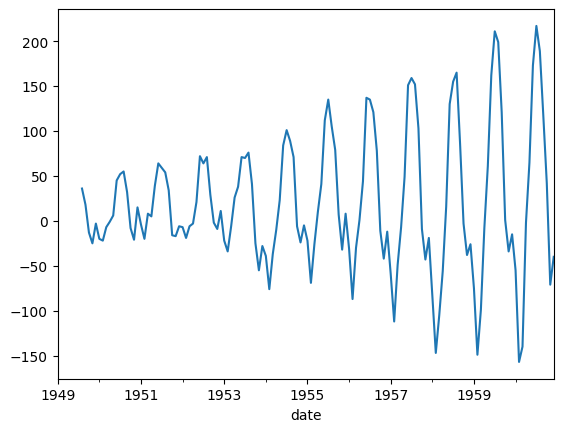

In [17]:
# Seasonal Differencing
n=7
df['value_diff_n'] = df['value'] - df['value'].shift(n)
df['value_diff_n'].plot()

<Axes: xlabel='date'>

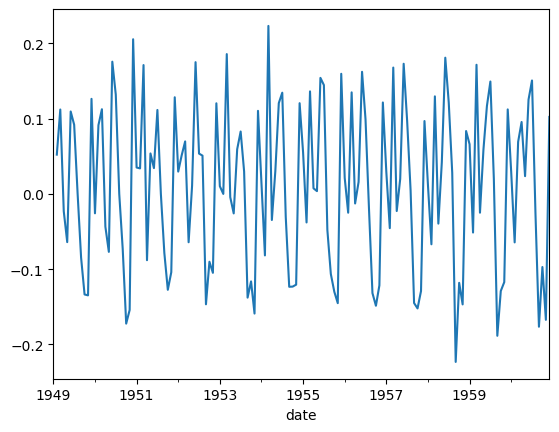

In [18]:
# Transformation

df['value_log'] = np.log(df['value'])
df['value_log_diff'] = df['value_log'] - df['value_log'].shift(1)
df['value_log_diff'].plot()

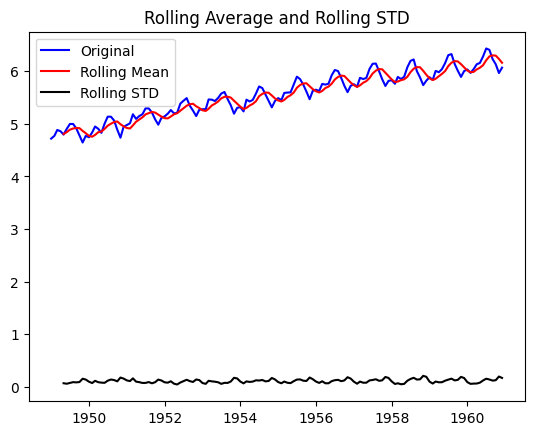

In [19]:
movingAverage = df['value_log'].rolling(window=5).mean()
movingSTD = df['value_log'].rolling(window=5).std()
plt.plot(df['value_log'], color='blue', label='Original')
plt.plot(movingAverage, color='red', label='Rolling Mean')
plt.plot(movingSTD, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title("Rolling Average and Rolling STD")
plt.show()

In [20]:
adf_test(df['value_log'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
kpss_test(df['value_log'])

Results of KPSS test: 
Test Statistic           1.668651
p-value                  0.010000
#Lags used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_22484\461419555.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags='auto')


Additive model y(t) = Trend + Seasonalioty + Residual
Multiplicative Model = 

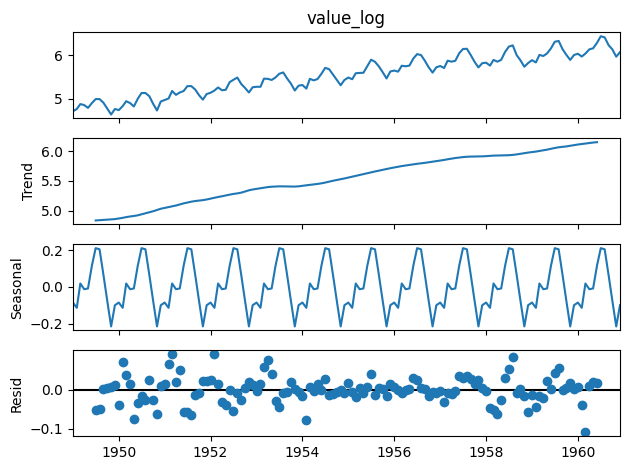

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['value_log'], model = "additive")
decomposition.plot()
plt.show()

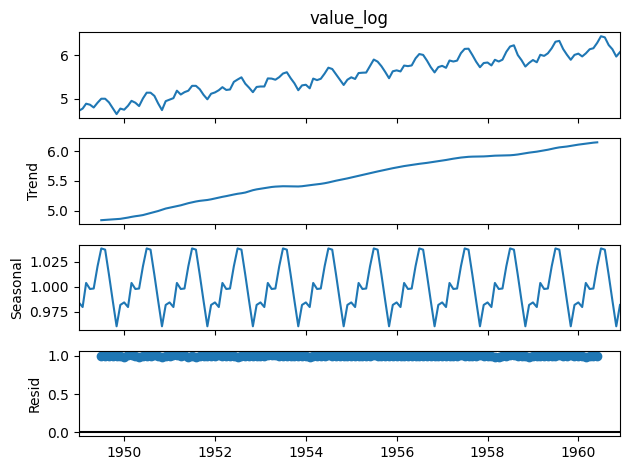

In [23]:
decomposition = seasonal_decompose(df['value_log'], model = "multiplicative")
decomposition.plot()
plt.show()

In [24]:
print(decomposition.trend)

date
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64


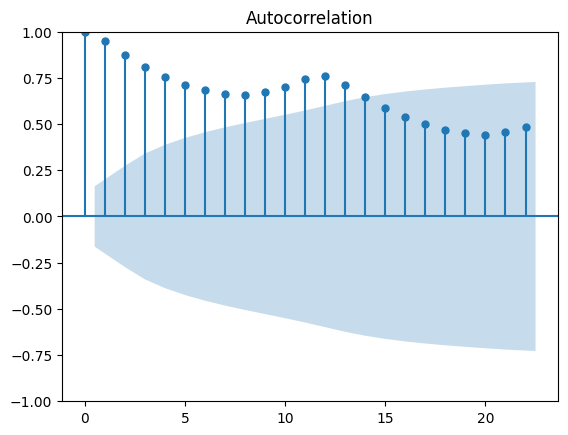

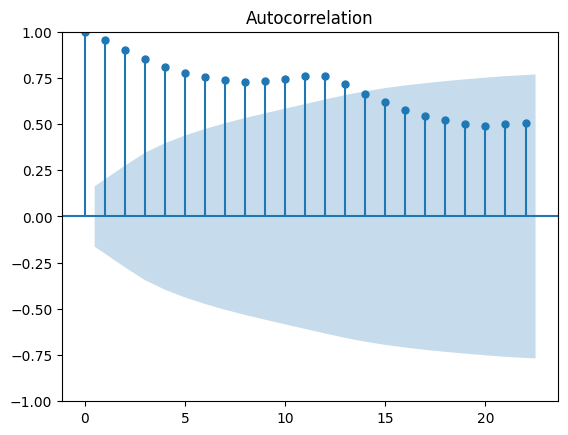

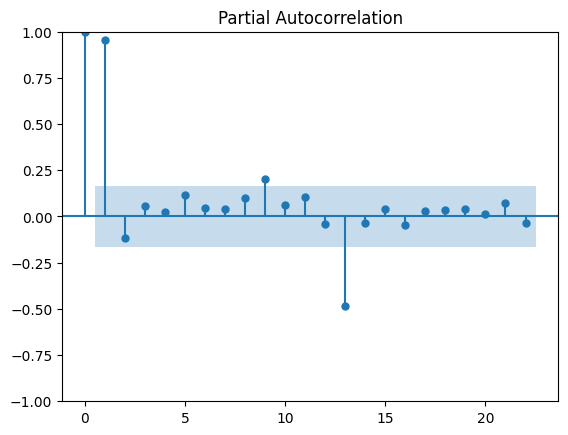

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['value'])
plt.show()

plot_acf(df['value_log'])
plt.show()
plot_pacf(df['value_log'])
plt.show()

In [26]:
df.head(10)

,value,value_diff,value_diff_n,value_log,value_log_diff
date,,,,,
1949-01-01,112,NaN,NaN,4.718499,NaN
1949-02-01,118,6.0,NaN,4.770685,0.052186
1949-03-01,132,14.0,NaN,4.882802,0.112117
1949-04-01,129,-3.0,NaN,4.859812,-0.022990
1949-05-01,121,-8.0,NaN,4.795791,-0.064022
1949-06-01,135,14.0,NaN,4.905275,0.109484
1949-07-01,148,13.0,NaN,4.997212,0.091937
1949-08-01,148,0.0,36.0,4.997212,0.000000
1949-09-01,136,-12.0,18.0,4.912655,-0.084557


c:\Users\ABHINAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ABHINAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ABHINAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR Model


c:\Users\ABHINAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


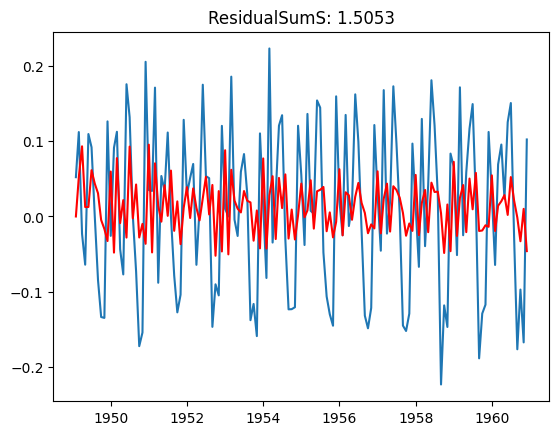

In [27]:
from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(df['value']).diff().dropna()
model1 = ARIMA(ts_log, order=(2,1,2))
results_AR = model1.fit()
plt.plot(ts_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('ResidualSumS: %.4f'%sum((results_AR.fittedvalues - ts_log)**2))
print("Plotting AR Model")

In [28]:
ts_data = df['value_diff'].dropna()

ts_log = np.log(ts_data)

ts_log_diff = ts_log.diff().dropna()

result = adfuller(ts_log_diff)
print("ADF Statistic: %f" % result[0])
print("p-Value %f" % result[1])

if result[1] > 0.05:
    print("Series is not stationary.")
else:
    model1 = ARIMA(ts_log_diff, order=(2,1,2))
    results_AR = model1.fit()

    plt.plot(ts_log_diff)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.show()

MissingDataError: exog contains inf or nans

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(df['value_diff']).diff().dropna()
model1 = ARIMA(ts_log, order=(2,1,2))
results_AR = model1.fit()
plt.plot(ts_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('ResidualSumS: %.4f'%sum((results_AR.fittedvalues - ts_log)**2))
print("Plotting AR Model")

LinAlgError: Schur decomposition solver error.

Plotting AR Model


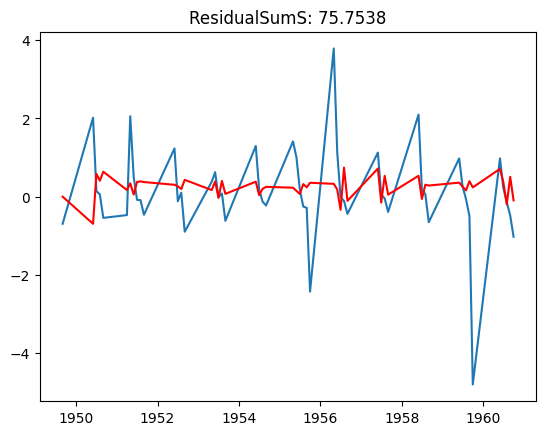

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(df['value_diff_n']).diff().dropna()
model1 = ARIMA(ts_log, order=(2,1,2))
results_AR = model1.fit()
plt.plot(ts_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('ResidualSumS: %.4f'%sum((results_AR.fittedvalues - ts_log)**2))
print("Plotting AR Model")

Plotting AR Model


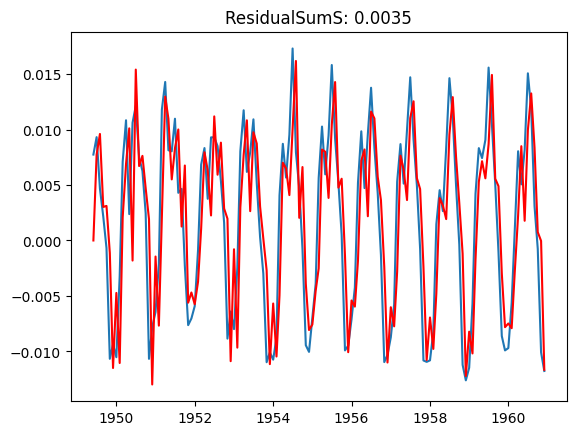

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ts_log = np.log(movingAverage).diff().dropna()
model1 = ARIMA(ts_log, order=(2,1,2))
results_AR = model1.fit()
plt.plot(ts_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('ResidualSumS: %.4f'%sum((results_AR.fittedvalues - ts_log)**2))
print("Plotting AR Model")